# Credit Card Fraud Detection

### Business problem
The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.

Main challenges involved in credit card fraud detection are:

Many data is processed every day and the model which is build must be fast in order to respond to the scam in time.
Related to imbalanced data  most of the transactions (99.8%) are not fraudulent thats makes it really hard for detecting the fraudulent ones. The availability  of the data is usually private and the misclassified data can be another problem, as not every fraudulent transaction is caught and reported.

How to deal with these problems?

The model used must be simple and fast enough to classify it as a fraud as quiclky as possible and detect the anomaly.

Imbalance problem can be dealt with by properly using some methods like:
- To protect the privacy of the user, the dimensionality of the data can be reduced.
- A more trustworthy source must be taken which double-check the data, at least for training the model.
- A simple can be made and interpretabled so that when the scammer adapts to it with just some tweaks it is possible to have a new model up and running to deploy.

## Step 1: Load the data

In [1]:
# Importing lybraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec


In [2]:
# Reading the dataset

base = pd.read_csv("creditcard.csv")
base.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


## Step 2: Data Cleaning

In [3]:
base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [4]:
#checking missing values
base.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

## Step 3: Data Exploratory

In [5]:
base.shape

(284807, 31)

In [6]:
base.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [7]:
# Distribution of legit and fraudulent transactions
class_counts = base["Class"].value_counts()
class_counts
# class - column
# imbalance class

0    284315
1       492
Name: Class, dtype: int64

In [8]:
percentage=base["Class"].value_counts(normalize=True)
percentage

0    0.998273
1    0.001727
Name: Class, dtype: float64

- 99,82% is a normal transaction
- 0.17% is a fraudulent transaction

There is an imbalance in the dataset.

This dataset is unbalanced

0-> Normal transaction

1-> Fraudulent transaction

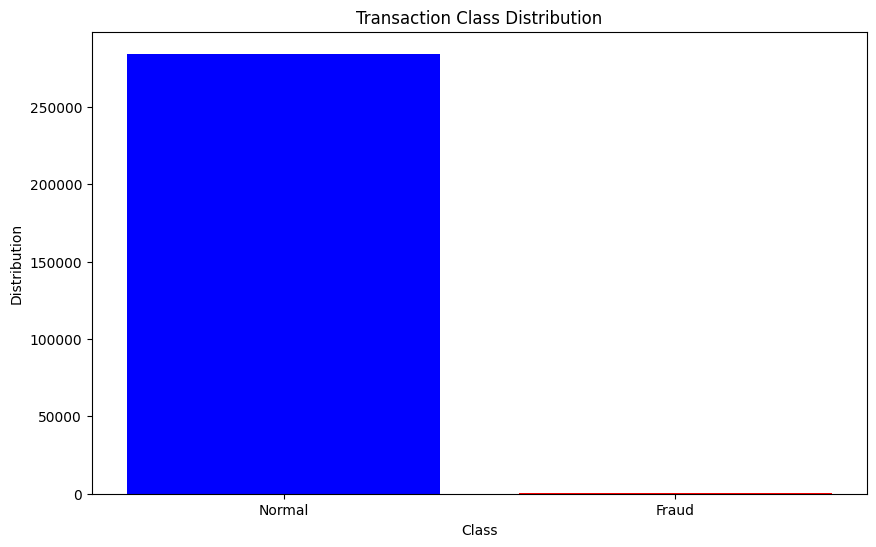

In [9]:
# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(class_counts.index, class_counts.values, color=["blue", "red"])
plt.xticks(class_counts.index, ["Normal", "Fraud"])  # Set x-ticks and labels
plt.xlabel("Class")
plt.ylabel("Distribution")
plt.title("Transaction Class Distribution")

plt.show()

In [10]:
# Separate the classes for analysis

normal = base[base["Class"]==0]
fraud  = base[base["Class"]== 1]

In [11]:
normal.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [12]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

## Feature Engineering

In [13]:
normal.shape

(284315, 31)

In [14]:
fraud.shape

(492, 31)

### New "normal" dataset containing the same shape of Fraud quantity (492 rows)

In [15]:
# Solve the imbalance dataset
normal_sample=normal.sample(n=492)

In [16]:
normal_sample.shape

(492, 31)

### Contatenate the new dataset with Fraud dataset

In [17]:
new_base = pd.concat([normal_sample,fraud], axis=0, ignore_index=True)
new_base

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,117978.0,-2.695151,1.198946,1.199418,2.974101,0.707506,0.941744,0.483414,0.383689,-0.866074,...,0.151349,0.884704,-0.328290,0.730361,1.119445,0.306336,-1.311039,-0.362762,24.89,0
1,139364.0,-0.780575,0.572595,-0.052792,-2.500324,0.215631,-0.968782,0.465050,0.289511,-1.873139,...,0.164842,0.224207,-0.174151,-0.404694,0.098127,-0.395699,0.183595,0.092950,20.00,0
2,53696.0,-1.028359,-0.009252,2.509194,-0.934885,-0.622088,0.096197,0.193738,0.322419,0.543962,...,0.003762,-0.090091,0.003799,0.112856,0.052545,0.936432,-0.040213,0.059799,84.95,0
3,73356.0,-0.665665,0.950318,1.496891,0.363503,1.276870,-0.131181,1.982909,-1.584296,0.963100,...,-0.244039,0.467748,-0.444977,-0.441954,-0.233511,-0.491591,-1.140785,-0.968018,26.49,0
4,37381.0,0.941979,-0.871006,0.909481,0.737443,-1.294007,-0.055130,-0.551423,-0.008348,-0.615476,...,-0.093399,0.111171,-0.124537,0.410571,0.382625,-0.231455,0.072417,0.061875,158.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
979,169142.0,-1.927883,1.125653,-4.518331,1.749293,-1.566487,-2.010494,-0.882850,0.697211,-2.064945,...,0.778584,-0.319189,0.639419,-0.294885,0.537503,0.788395,0.292680,0.147968,390.00,1
980,169347.0,1.378559,1.289381,-5.004247,1.411850,0.442581,-1.326536,-1.413170,0.248525,-1.127396,...,0.370612,0.028234,-0.145640,-0.081049,0.521875,0.739467,0.389152,0.186637,0.76,1
981,169351.0,-0.676143,1.126366,-2.213700,0.468308,-1.120541,-0.003346,-2.234739,1.210158,-0.652250,...,0.751826,0.834108,0.190944,0.032070,-0.739695,0.471111,0.385107,0.194361,77.89,1
982,169966.0,-3.113832,0.585864,-5.399730,1.817092,-0.840618,-2.943548,-2.208002,1.058733,-1.632333,...,0.583276,-0.269209,-0.456108,-0.183659,-0.328168,0.606116,0.884876,-0.253700,245.00,1


In [18]:
new_base["Class"].value_counts()

0    492
1    492
Name: Class, dtype: int64

In [20]:
from sklearn.preprocessing import RobustScaler



In [21]:
new_base = RobustScaler().fit(base[["Time", "Amount"]])

base[["Time", "Amount"]] = new_base.transform(base[["Time", "Amount"]])

base.head().append(base.tail())

<ipython-input-21-7ade28e96235>:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  base.head().append(base.tail())


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,1.783274,0
1,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.269825,0
2,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,4.983721,0
3,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,1.418291,0
4,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0.670579,0
284802,1.034951,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,-0.296653,0
284803,1.034963,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,0.038986,0
284804,1.034975,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,0.641096,0
284805,1.034975,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,-0.167680,0
284806,1.035022,-0.533413,-0.189733,0.703337,-0.506271,-0.012546,-0.649617,1.577006,-0.414650,0.486180,...,0.261057,0.643078,0.376777,0.008797,-0.473649,-0.818267,-0.002415,0.013649,2.724796,0


## Train model

In [23]:
X = base.drop("Class", axis=1)
y = base["Class"]

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42)

## Model deployment

### Model 1

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rfc=RandomForestClassifier()

In [28]:
rfc_model=rfc.fit(X_train,y_train)

In [29]:
y_pred1=rfc_model.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score

### Model 2

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
lr= LogisticRegression()

In [ ]:
lr_model = lr.fit(X_train, y_train)

In [34]:
y_pred2=lr_model.predict(X_test)

### Model 3

In [35]:
from sklearn.metrics import recall_score
from sklearn.neural_network import MLPClassifier

In [36]:
MLPC = MLPClassifier(hidden_layer_sizes=(200), max_iter=10000)

In [37]:
MLPC_model = MLPC.fit(X_train, y_train)

In [38]:
y_pred3 = MLPC_model.predict(X_test)

## Model Evaluation

In [48]:
accuracy_score(y_test,y_pred1)



0.9996137776061234

In [40]:
accuracy_score(y_test,y_pred2)

0.9992743700478681

In [41]:
recall_acc = recall_score (y_test,y_pred3)
recall_acc

0.8161764705882353

In [43]:
accuracy_score(y_test,y_pred3)

0.9995903701883126